## Data Quality Report (Morningstar Mutual Fund and ETF EDA)

In [45]:
##Let's the cell display across the whole browser window on wider displays
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [46]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
pd.set_option("display.max_columns", 30)
#allow for the full df to be displayed in cell

In [48]:
df1 = pd.read_csv('Fund Data (1).csv')

In [49]:
df1.describe(include='all')
#Initial thoughts:
#--It is odd that RETURN_1M-->RETURN_3M are not displaying means and percentiles.
#--The RETURN_NET_1Y column has an extremely large max value so it displays in scientific notation
#--There are 4 instances of SHARECLASS_ID when this value is presumed to be a unique value

SHARECLASS_ID  \
count                             7062   
unique                            7059   
top     F0GBR04L7T                       
freq                                 4   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                          SHARECLASS_NAME  \
count                                                7062   
unique                                               7059   
top     BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
freq                                                    4   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
count                                7062          7062.000000   
unique                               4858                  NaN   
top     ANZ Vanguard Australian Shr Index                  NaN   
freq                                   16                  NaN   
mean                                  NaN             1.709856   
std                                   NaN             1.485067   
min                                   NaN             1.000000   
25%                                   NaN             1.000000   
50%                                   NaN             1.000000   
75%                                   NaN             2.000000   
max                                   NaN            16.000000   

            FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
count                   7062                       7062   
unique                   505                        440   
top     iShares               US Large-Cap Blend Equity   
freq                     343                        221   
mean                     NaN                        NaN   
std                      NaN                        NaN   
min                      NaN                        NaN   
25%                      NaN                        NaN   
50%                      NaN                        NaN   
75%                      NaN                        NaN   
max                      NaN                        NaN   

       MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
count                      7062                 7062                 7062   
unique                       83                    7                   11   
top               Trading Tools               Equity               FE_ALL   
freq                        694                 2794                 2775   
mean                        NaN                  NaN                  NaN   
std                         NaN                  NaN                  NaN   
min                         NaN                  NaN                  NaN   
25%                         NaN                  NaN                  NaN   
50%                         NaN                  NaN                  NaN   
75%                         NaN                  NaN                  NaN   
max                         NaN                  NaN                  NaN   

       RETURN_NET_1M RETURN_NET_2M RETURN_NET_3M  RETURN_NET_6M  \
count           7062          7062          7062    7062.000000   
unique          1420          1931          1927            NaN   
top             2.28          4.41          4.63            NaN   
freq              42            28            21            NaN   
mean             NaN     

In [50]:
df1.dtypes
##We see here that those columns are of the wrong datatype (object) when they shold be numeric

SHARECLASS_ID                object
SHARECLASS_NAME              object
FUND_NAME                    object
SHARE_CLASS_COUNTER           int64
FUND_FAMILY_NAME             object
MSTAR_CATEGORY_NAME          object
MSTAR_GLOB_CATEGORY_NAME     object
MSTAR_BROAD_CATEGORY         object
COMMON_SOURCE_SYSTEM         object
RETURN_NET_1M                object
RETURN_NET_2M                object
RETURN_NET_3M                object
RETURN_NET_6M               float64
RETURN_NET_1Y               float64
RETURN_NET_2Y               float64
RETURN_NET_3Y               float64
RETURN_NET_4Y               float64
RETURN_NET_5Y               float64
dtype: object

In [51]:
#converting columns to numeric and coercing any missing values
cols = ['RETURN_NET_1M','RETURN_NET_2M','RETURN_NET_3M']
df1[cols]=df1[cols].apply(pd.to_numeric, errors='coerce')
df1.dtypes

SHARECLASS_ID                object
SHARECLASS_NAME              object
FUND_NAME                    object
SHARE_CLASS_COUNTER           int64
FUND_FAMILY_NAME             object
MSTAR_CATEGORY_NAME          object
MSTAR_GLOB_CATEGORY_NAME     object
MSTAR_BROAD_CATEGORY         object
COMMON_SOURCE_SYSTEM         object
RETURN_NET_1M               float64
RETURN_NET_2M               float64
RETURN_NET_3M               float64
RETURN_NET_6M               float64
RETURN_NET_1Y               float64
RETURN_NET_2Y               float64
RETURN_NET_3Y               float64
RETURN_NET_4Y               float64
RETURN_NET_5Y               float64
dtype: object

In [52]:
df1.replace('<null>', np.nan, inplace=True)
##Replacing any missing values with np.nan as it was observed in df2 there were '<null>' strings

## Addressing Missing Data

In [53]:
##Checking for any missing data:
missing1ratio = (df1.isnull().sum(axis=0) / len(df1)*100).sort_values(ascending=False)
print(missing1ratio)
##looks like a few missing values in the coerced columns, expressed as percentage missing


RETURN_NET_3M               0.212404
RETURN_NET_2M               0.212404
RETURN_NET_1M               0.212404
RETURN_NET_5Y               0.000000
MSTAR_GLOB_CATEGORY_NAME    0.000000
SHARECLASS_NAME             0.000000
FUND_NAME                   0.000000
SHARE_CLASS_COUNTER         0.000000
FUND_FAMILY_NAME            0.000000
MSTAR_CATEGORY_NAME         0.000000
COMMON_SOURCE_SYSTEM        0.000000
MSTAR_BROAD_CATEGORY        0.000000
RETURN_NET_4Y               0.000000
RETURN_NET_6M               0.000000
RETURN_NET_1Y               0.000000
RETURN_NET_2Y               0.000000
RETURN_NET_3Y               0.000000
SHARECLASS_ID               0.000000
dtype: float64


In [54]:
df1[df1.RETURN_NET_1M.isnull()]
##Looks like missingness is in rows 4686-4688 and 4695--4713 and then 5123.
#No discernible pattern to the occurence of the missingness in terms of fund name after viewing
#checked df1[df1.FUND_NAME.str.contains("SPDR")]

SHARECLASS_ID  \
4685  FOUSA068X3                       
4686  FOUSA068X4                       
4688  FOUSA068X5                       
4695  FOUSA06VOC                       
4696  FOUSA06VOD                       
4698  FOUSA06VOE                       
4699  FOUSA06VOF                       
4700  FOUSA06VOH                       
4701  FOUSA06VOI                       
4702  FOUSA06VOJ                       
4704  FOUSA06VOK                       
4705  FOUSA06VOL                       
4706  FOUSA06VOM                       
4713  FOUSA0861F                       
5123  F00000LOZ5                       

                                        SHARECLASS_NAME  \
4685                       SPDR S&P Emerging Europe ETF   
4686                SPDR S&P Emerging Latin America ETF   
4688         SPDR S&P Emerging Middle East & Africa ETF   
4695  SPDR S&P International Consumer Discretionary ...   
4696  SPDR S&P International Consumer Staples Sector...   
4698           SPDR S&P International Energy Sector ETF   
4699        SPDR S&P International Financial Sector ETF   
4700      SPDR S&P International Health Care Sector ETF   
4701       SPDR S&P International Industrial Sector ETF   
4702        SPDR S&P International Materials Sector ETF   
4704       SPDR S&P International Technology Sector ETF   
4705  SPDR S&P International Telecommunications Sect...   
4706        SPDR S&P International Utilities Sector ETF   
4713                                SPDR S&P Russia ETF   
5123  Swisscanto (CH) Index Fund V - Swisscanto (CH)...   

                                              FUND_NAME  SHARE_CLASS_COUNTER  \
4685                         SPDRS&PEmerging Europe ETF                    1   
4686                  SPDRS&PEmerging Latin America ETF                    1   
4688           SPDRS&PEmerging Middle East & Africa ETF                    1   
4695  SPDRS&PInternational Consumer Discretionary Se...                    1   
4696   SPDRS&PInternational Consumer Staples Sector ETF                    1   
4698             SPDRS&PInternational Energy Sector ETF                    1   
4699          SPDRS&PInternational Financial Sector ETF                    1   
4700        SPDRS&PInternational Health Care Sector ETF                    1   
4701         SPDRS&PInternational Industrial Sector ETF                    1   
4702          SPDRS&PInternational Materials Sector ETF                    1   
4704         SPDRS&PInternational Technology Sector ETF                    1   
4705  SPDRS&PInternational Telecommunications Sector...                    1   
4706          SPDRS&PInternational Utilities Sector ETF                    1   
4713                                  SPDRS&PRussia ETF                    1   
5123  Swisscanto (CH) Index Fund V - Swisscanto (CH)...                    1   

          FUND_FAMILY_NAME   MSTAR_CATEGORY_NAME  \
4685  SPDR State Street Gl  Miscellaneous Region   
4686  SPDR State Street Gl   Latin America Stock   
4688  SPDR State Street Gl  Miscellaneous Region   
4695  SPDR State Street Gl     Consumer Cyclical   
4696  SPDR State Street Gl    Consumer Defensive   
4698  SPDR State Street Gl         Equity Energy   
4699  SPDR State Street Gl             Financial   
4700  SPDR State Street Gl                Health   
4701  SPDR State Street Gl           Industrials   
4702  SPDR State Street Gl     Natural Resources   
4704  SPDR State Street Gl            Technology   
4705  SPDR State Street Gl        Communications   
4706  SPDR State Street Gl             Utilities   
4713  SPDR State Street Gl  Miscellaneous Region   
5123  Swisscanto Fondsleit           Global Bond   

                     MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY  \
4685                             Other Equity               Equity   
4686                     Latin America Equity               Equity   
4688                             Other Equity               Equity   
4695  Consumer Goods & Services Sector Equi

## Addressing Outliers

SHARECLASS_ID SHARECLASS_NAME  \
394  F0GBR06SU1                         Avanza Zero   

                               FUND_NAME  SHARE_CLASS_COUNTER  \
394  Avanza Zero- Den avgiftsfria fonden                    1   

         FUND_FAMILY_NAME MSTAR_CATEGORY_NAME MSTAR_GLOB_CATEGORY_NAME  \
394  Avanza Fonder              Sweden Equity      Other Europe Equity   

    MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  RETURN_NET_1M  RETURN_NET_2M  \
394               Equity               EUROPE           2.27           8.31   

     RETURN_NET_3M  RETURN_NET_6M  RETURN_NET_1Y  RETURN_NET_2Y  \
394           8.24           3.49    100000000.0           9.67   

     RETURN_NET_3Y  RETURN_NET_4Y  RETURN_NET_5Y  
394            9.7          10.82          13.86

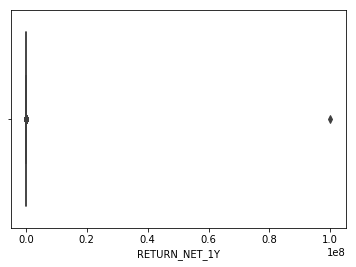

In [55]:
display(df1[df1.RETURN_NET_1Y==max(df1.RETURN_NET_1Y)])
##The max RETURN_NET_1Y value is clearly too high at 100000000.0

numcols = list(df1.select_dtypes(['float64','int64']).columns)
sns.boxplot(df1[numcols[5]])
##Investigated the rest of the numeric columns, finding that RETURN_NET_1M is the only one needing correcting

In [56]:
##Replacing the value with 10, assuming extra zeroes were mistakenly appended
df1.iloc[394, df1.columns.get_loc('RETURN_NET_1Y')]=10

SHARECLASS_ID                          SHARECLASS_NAME  \
1037  F00000PQUZ                      Commerzbank ETN -2x VSTOXXF Daily Short   

                                    FUND_NAME  SHARE_CLASS_COUNTER  \
1037  Commerzbank ETN -2x VSTOXXF Daily Short                    1   

          FUND_FAMILY_NAME                MSTAR_CATEGORY_NAME  \
1037  Commerzbank AG, Fran  Trading - Leveraged/Inverse Other   

     MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
1037            Trading Tools          Alternative               FE_ALL   

      RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
1037          34.04         133.98          58.14         203.93   

      RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  \
1037        1700.06          30.02         -51.98          -49.5   

      RETURN_NET_5Y  
1037         -25.05

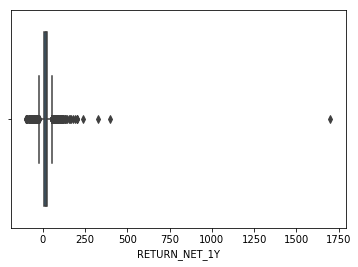

In [57]:
sns.boxplot(df1['RETURN_NET_1Y'])
df1[df1.RETURN_NET_1Y==max(df1.RETURN_NET_1Y)]

#Looks as though there is one more outlier value, this could  be more feasible given the nature of the shareclass/category (Commerzbank ETN -2x VSTOXXF Daily Short)
#However, replacing the value with 170 in this case under the same assumption since it was found this value affects investigation of later trends



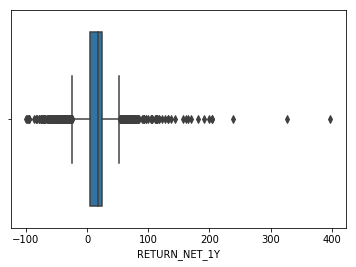

In [58]:
df1.iloc[1037, df1.columns.get_loc('RETURN_NET_1Y')]=170 
sns.boxplot(df1['RETURN_NET_1Y'])


## Removing Duplicates

In [59]:
df1[df1.SHARECLASS_ID.str.contains("F0GBR04L7T")]
##We also observed there are 4 instances of a duplicate shareclass id
##The SHARECLASS_NAME happens to contain BNY

SHARECLASS_ID  \
476  F0GBR04L7T                       
477  F0GBR04L7T                       
478  F0GBR04L7T                       
479  F0GBR04L7T                       

                                       SHARECLASS_NAME  \
476  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
477  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
478  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
479  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   

                                             FUND_NAME  SHARE_CLASS_COUNTER  \
476  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
477  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
478  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
479  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   

         FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
476  BNY Mellon Global Ma  US Large-Cap Blend Equity   
477  BNY Mellon Global Ma  US Large-Cap Blend Equity   
478  BNY Mellon Global Ma  US Large-Cap Blend Equity   
479  BNY Mellon Global Ma  US Large-Cap Blend Equity   

      MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
476  US Equity Large Cap Blend               Equity               EUROPE   
477  US Equity Large Cap Blend               Equity               EUROPE   
478  US Equity Large Cap Blend               Equity               EUROPE   
479  US Equity Large Cap Blend               Equity               EUROPE   

     RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
476           3.73            6.5           6.01           1.16   
477           3.73            6.5           6.01           1.16   
478           3.73            6.5           6.01           1.16   
479           3.73            6.5           6.01           1.16   

     RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  RETURN_NET_5Y  
476          14.56           8.48          11.44          14.65          15.55  
477          14.56           8.48          11.44          14.65          15.55  
478          14.56           8.48          11.44          14.65          15.55  
479          14.56           8.48          11.44          14.65          15.55

In [60]:
##Dropping duplicates
df1= df1.drop_duplicates()

In [61]:
df1.describe(include='all')

SHARECLASS_ID  \
count                             7059   
unique                            7059   
top     F00000PCOS                       
freq                                 1   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                          SHARECLASS_NAME  \
count                                                7059   
unique                                               7059   
top     FirstChoice WS Inv - CFS WS Index Australian Bond   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
count                                7059          7059.000000   
unique                               4858                  NaN   
top     ANZ Vanguard Australian Shr Index                  NaN   
freq                                   16                  NaN   
mean                                  NaN             1.710157   
std                                   NaN             1.485310   
min                                   NaN             1.000000   
25%                                   NaN             1.000000   
50%                                   NaN             1.000000   
75%                                   NaN             2.000000   
max                                   NaN            16.000000   

            FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
count                   7059                       7059   
unique                   505                        440   
top     iShares               US Large-Cap Blend Equity   
freq                     343                        218   
mean                     NaN                        NaN   
std                      NaN                        NaN   
min                      NaN                        NaN   
25%                      NaN                        NaN   
50%                      NaN                        NaN   
75%                      NaN                        NaN   
max                      NaN                        NaN   

       MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
count                      7059                 7059                 7059   
unique                       83                    7                   11   
top               Trading Tools               Equity               FE_ALL   
freq                        694                 2791                 2775   
mean                        NaN                  NaN                  NaN   
std                         NaN                  NaN                  NaN   
min                         NaN                  NaN                  NaN   
25%                         NaN                  NaN                  NaN   
50%                         NaN                  NaN                  NaN   
75%                         NaN                  NaN                  NaN   
max                         NaN                  NaN                  NaN   

        RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
count     7044.000000    7044.000000    7044.000000    7059.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      

In [202]:
df1.shape

(7059, 18)

## Category Cleaning

In [62]:
#Noticed in the MSTAR_BROAD_CATEGORY that the string "Equity" was sometimes displayed as EQUITY
df1['MSTAR_BROAD_CATEGORY'] = df1['MSTAR_BROAD_CATEGORY'].str.lower()


## Data set 2

In [63]:
df2 = pd.read_csv('Fund Data (2).csv')

In [64]:
df2.describe(include='all')

#Appears to contain 2 more rows than dataset 1
#None of the columns are Numeric
#Contains values recorded as the string '<null>' 


SHARECLASS_ID  \
count                             7061   
unique                            7061   
top     F00000PCOS                       
freq                                 1   

                                          SHARECLASS_NAME  \
count                                                7061   
unique                                               7061   
top     FirstChoice WS Inv - CFS WS Index Australian Bond   
freq                                                    1   

                                FUND_NAME CATEGORY SHARPE_RATIO_1Y  \
count                                7061     7061            7061   
unique                               4859        4            1029   
top     ANZ Vanguard Australian Shr Index   Equity            2.44   
freq                                   16     3087              35   

       SHARPE_RATIO_3Y SHARPE_RATIO_5Y BETA_1Y BETA_3Y BETA_5Y INFO_RATIO_3Y  \
count             7061            7061    7061    7061    7061          7061   
unique             403             457     658     543     521           674   
top               0.75            0.95       1  <null>  <null>        <null>   
freq               117              89     536    1288    1295          1288   

       INFO_RATIO_5Y  
count           7061  
unique          5656  
top           <null>  
freq            1295

In [65]:
df2.replace('<null>', np.nan, inplace=True)
print(df2.dtypes)
numcols2 = ['SHARPE_RATIO_1Y','SHARPE_RATIO_3Y','SHARPE_RATIO_5Y','BETA_1Y','BETA_3Y','BETA_5Y','INFO_RATIO_3Y','INFO_RATIO_5Y' ]
df2[numcols2]=df2[numcols2].apply(pd.to_numeric, errors='coerce')
## Converts all numeric columns to float64

SHARECLASS_ID      object
SHARECLASS_NAME    object
FUND_NAME          object
CATEGORY           object
SHARPE_RATIO_1Y    object
SHARPE_RATIO_3Y    object
SHARPE_RATIO_5Y    object
BETA_1Y            object
BETA_3Y            object
BETA_5Y            object
INFO_RATIO_3Y      object
INFO_RATIO_5Y      object
dtype: object


In [66]:
df2.describe(include='all')

SHARECLASS_ID  \
count                             7061   
unique                            7061   
top     F00000PCOS                       
freq                                 1   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                          SHARECLASS_NAME  \
count                                                7061   
unique                                               7061   
top     FirstChoice WS Inv - CFS WS Index Australian Bond   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                FUND_NAME CATEGORY  SHARPE_RATIO_1Y  \
count                                7061     7061      7045.000000   
unique                               4859        4              NaN   
top     ANZ Vanguard Australian Shr Index   Equity              NaN   
freq                                   16     3087              NaN   
mean                                  NaN      NaN         1.920338   
std                                   NaN      NaN         2.408002   
min                                   NaN      NaN       -20.330000   
25%                                   NaN      NaN         0.620000   
50%                                   NaN      NaN         1.880000   
75%                                   NaN      NaN         2.990000   
max                                   NaN      NaN        47.470000   

        SHARPE_RATIO_3Y  SHARPE_RATIO_5Y      BETA_1Y      BETA_3Y  \
count       7046.000000      7046.000000  6910.000000  5773.000000   
unique              NaN              NaN          NaN          NaN   
top                 NaN              NaN          NaN          NaN   
freq                NaN              NaN          NaN          NaN   
mean           0.721029         0.884699     0.015236     0.957897   
std            1.614906         1.245530    43.532130     7.495397   
min           -4.540000        -4.830000 -1948.270000  -184.510000   
25%            0.410000         0.530000     0.720000     0.800000   
50%            0.680000         0.900000     0.970000     0.970000   
75%            0.890000         1.240000     1.060000     1.020000   
max           26.000000        21.860000  1188.090000   209.470000   

            BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  
count   5766.000000    5773.000000    5766.000000  
unique          NaN            NaN            NaN  
top             NaN            NaN            NaN  
freq            NaN            NaN            NaN  
mean       0.946596      -0.632581      -0.607171  
std        3.835798       2.877199       2.681916  
min      -77.290000     -64.180000     -65.163350  
25%        0.800000      -0.680000      -0.676992  
50%        0.980000      -0.150000      -0.161340  
75%        1.020000       0.230000       0.225187  
max       89.500000       4.800000       3.927860

In [67]:
missing2ratio = (df2.isnull().sum(axis=0) / len(df2)*100).sort_values(ascending=False)
print(missing2ratio)
##There is significant missing data in INFO_RATIO and BETA for both 3Y and 5Y columns
#This could be due to the shares not being in existence long enough for the data to exist on a 3 year and 5 year timeframe since they seem to be missing together.

INFO_RATIO_5Y      18.340178
BETA_5Y            18.340178
INFO_RATIO_3Y      18.241042
BETA_3Y            18.241042
BETA_1Y             2.138507
SHARPE_RATIO_1Y     0.226597
SHARPE_RATIO_5Y     0.212434
SHARPE_RATIO_3Y     0.212434
CATEGORY            0.000000
FUND_NAME           0.000000
SHARECLASS_NAME     0.000000
SHARECLASS_ID       0.000000
dtype: float64


In [282]:
#No obvious pattern in missingness after runnign the below
#df2[pd.isnull(df2).any(axis=1)]
#df2[pd.isnull(df2['BETA_1Y'])]

In [283]:
#Dropping any duplicates
df2=df2.drop_duplicates()

In [284]:
df2.shape

(7061, 12)

In [70]:
df3 = pd.merge(df1, df2, how='right', left_on='SHARECLASS_ID', right_on='SHARECLASS_ID')
df3[df3.SHARECLASS_NAME_x.isnull()]
#For exploratory purposes, there are two shareclasses that are present in df2 but not in df1 (hence the right join)
#Aegon International Emerging Markets Equity .... will be dropping these due to lack of information
#F000005PCP, F000005PCQ	

SHARECLASS_ID SHARECLASS_NAME_x FUND_NAME_x  \
7059  F000005PCP                                   NaN         NaN   
7060  F000005PCQ                                   NaN         NaN   

      SHARE_CLASS_COUNTER FUND_FAMILY_NAME MSTAR_CATEGORY_NAME  \
7059                  NaN              NaN                 NaN   
7060                  NaN              NaN                 NaN   

     MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
7059                      NaN                  NaN                  NaN   
7060                      NaN                  NaN                  NaN   

      RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
7059            NaN            NaN            NaN            NaN   
7060            NaN            NaN            NaN            NaN   

      RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  \
7059            NaN            NaN            NaN            NaN   
7060            NaN            NaN            NaN            NaN   

      RETURN_NET_5Y                                  SHARECLASS_NAME_y  \
7059            NaN  Aegon International Emerging Markets Equity Tr...   
7060            NaN  Aegon International Emerging Markets Equity Tr...   

                                            FUND_NAME_y CATEGORY  \
7059  AEGON International Emerging Markets Equity Tr...   Equity   
7060  AEGON International Emerging Markets Equity Tr...   Equity   

      SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  \
7059             0.86             0.64             0.51     1.16     0.84   
7060             0.91             0.67             0.54     1.14     0.81   

      BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  
7059     0.87           0.41        0.28370  
7060     0.85           0.44        0.32374

In [71]:
df3 = pd.merge(df1, df2, how='inner', left_on=['SHARECLASS_ID','SHARECLASS_NAME','FUND_NAME'], right_on=['SHARECLASS_ID','SHARECLASS_NAME','FUND_NAME'])

In [72]:
#Observing category distribution among both dfs
display(df3.groupby(["MSTAR_BROAD_CATEGORY", "CATEGORY"]).CATEGORY.count())


MSTAR_BROAD_CATEGORY  CATEGORY    
allocation            Allocation        14
                      Alternative       15
                      Equity           258
                      Fixed Income     109
alternative           Allocation        38
                      Alternative      184
                      Equity           309
                      Fixed Income     329
bonds/fixed income    Allocation       235
                      Alternative       84
                      Equity           233
                      Fixed Income     423
equity                Alternative      334
                      Equity          2098
                      Fixed Income     918
equity/stocks         Allocation       639
                      Fixed Income     652
fixed income          Equity           187
Name: CATEGORY, dtype: int64

In [281]:
display(df3.groupby('CATEGORY').count())

SHARECLASS_ID  SHARECLASS_NAME  FUND_NAME  SHARE_CLASS_COUNTER  \
CATEGORY                                                                       
Allocation              926              926        926                  926   
Alternative             617              617        617                  617   
Equity                 3085             3085       3085                 3085   
Fixed Income           2431             2431       2431                 2431   

              FUND_FAMILY_NAME  MSTAR_CATEGORY_NAME  MSTAR_GLOB_CATEGORY_NAME  \
CATEGORY                                                                        
Allocation                 926                  926                       926   
Alternative                617                  617                       617   
Equity                    3085                 3085                      3085   
Fixed Income              2431                 2431                      2431   

              MSTAR_BROAD_CATEGORY  COMMON_SOURCE_SYSTEM  RETURN_NET_1M  \
CATEGORY                                                                  
Allocation                     926                   926            926   
Alternative                    617                   617            617   
Equity                        3085                  3085           3085   
Fixed Income                  2431                  2431           2416   

              RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  RETURN_NET_1Y  \
CATEGORY                                                                   
Allocation              926            926            926            926   
Alternative             617            617            617            617   
Equity                 3085           3085           3085           3085   
Fixed Income           2416           2416           2431           2431   

              RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  RETURN_NET_5Y  \
CATEGORY                                                                   
Allocation              926            926            926            926   
Alternative             617            617            617            617   
Equity                 3085           3085           3085           3085   
Fixed Income           2431           2431           2431           2431   

              SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  BETA_1Y  \
CATEGORY                                                                   
Allocation                926              926              926      909   
Alternative               617              617              617      585   
Equity                   3085             3085             3085     3018   
Fixed Income             2415             2416             2416     2396   

              BETA_3Y  BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  STDRETS  \
CATEGORY                                                                
Allocation        757      754            757            754      926   
Alternative       524      524            524            524      617   
Equity           2435     2432           2435           2432     3085   
Fixed Income     2055     2054           2055           2054     2431   

              MEANRETS  
CATEGORY                
Allocation         926  
Alternative        617  
Equity            3085  
Fixed Income      2431

In [73]:
df3.describe(include='all')

SHARECLASS_ID  \
count                             7059   
unique                            7059   
top     F00000PCOS                       
freq                                 1   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                          SHARECLASS_NAME  \
count                                                7059   
unique                                               7059   
top     FirstChoice WS Inv - CFS WS Index Australian Bond   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
count                                7059          7059.000000   
unique                               4858                  NaN   
top     ANZ Vanguard Australian Shr Index                  NaN   
freq                                   16                  NaN   
mean                                  NaN             1.710157   
std                                   NaN             1.485310   
min                                   NaN             1.000000   
25%                                   NaN             1.000000   
50%                                   NaN             1.000000   
75%                                   NaN             2.000000   
max                                   NaN            16.000000   

            FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
count                   7059                       7059   
unique                   505                        440   
top     iShares               US Large-Cap Blend Equity   
freq                     343                        218   
mean                     NaN                        NaN   
std                      NaN                        NaN   
min                      NaN                        NaN   
25%                      NaN                        NaN   
50%                      NaN                        NaN   
75%                      NaN                        NaN   
max                      NaN                        NaN   

       MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
count                      7059                 7059                 7059   
unique                       83                    6                   11   
top               Trading Tools               equity               FE_ALL   
freq                        694                 3350                 2775   
mean                        NaN                  NaN                  NaN   
std                         NaN                  NaN                  NaN   
min                         NaN                  NaN                  NaN   
25%                         NaN                  NaN                  NaN   
50%                         NaN                  NaN                  NaN   
75%                         NaN                  NaN                  NaN   
max                         NaN                  NaN                  NaN   

        RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
count     7044.000000    7044.000000    7044.000000    7059.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      

In [74]:
#Merged Dataset Dimensions
df3.shape

(7059, 27)

## Part 2

In [205]:
import sqlite3

In [206]:
connection = sqlite3.connect(':memory:')
##creating sqllite connection in memory

In [207]:
cursor = connection.cursor()
cursor.execute("SELECT * FROM sqlite_master WHERE type='table';")


In [208]:
df3.to_sql("morningstardb", connection, if_exists="replace")


In [209]:
print(pd.read_sql('select sql from sqlite_master',connection).sql[0])
#Database Schema with data types displayed


CREATE TABLE "morningstardb" (
"index" INTEGER,
  "SHARECLASS_ID" TEXT,
  "SHARECLASS_NAME" TEXT,
  "FUND_NAME" TEXT,
  "SHARE_CLASS_COUNTER" INTEGER,
  "FUND_FAMILY_NAME" TEXT,
  "MSTAR_CATEGORY_NAME" TEXT,
  "MSTAR_GLOB_CATEGORY_NAME" TEXT,
  "MSTAR_BROAD_CATEGORY" TEXT,
  "COMMON_SOURCE_SYSTEM" TEXT,
  "RETURN_NET_1M" REAL,
  "RETURN_NET_2M" REAL,
  "RETURN_NET_3M" REAL,
  "RETURN_NET_6M" REAL,
  "RETURN_NET_1Y" REAL,
  "RETURN_NET_2Y" REAL,
  "RETURN_NET_3Y" REAL,
  "RETURN_NET_4Y" REAL,
  "RETURN_NET_5Y" REAL,
  "CATEGORY" TEXT,
  "SHARPE_RATIO_1Y" REAL,
  "SHARPE_RATIO_3Y" REAL,
  "SHARPE_RATIO_5Y" REAL,
  "BETA_1Y" REAL,
  "BETA_3Y" REAL,
  "BETA_5Y" REAL,
  "INFO_RATIO_3Y" REAL,
  "INFO_RATIO_5Y" REAL,
  "STDRETS" REAL,
  "MEANRETS" REAL
)


In [80]:
sql_check = pd.read_sql_query("select * from morningstardb;", connection)
sql_check.head()
##testing SQL connection is working correctly

index                   SHARECLASS_ID  \
0      0  FVUSA04ADJ                       
1      1  FVUSA001AQ                       
2      2  F00000M8U5                       
3      3  F00000N9TF                       
4      4  F0000000IA                       

                                   SHARECLASS_NAME  \
0  1290 VT Socially Responsible Portfolio Class IA   
1  1290 VT Socially Responsible Portfolio Class IB   
2                 ABC-CA CSI 300 Index Equity Fund   
3                 ABC-CA CSI 500 Index Equity Fund   
4                    ABF Hong Kong Bond Index Fund   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
0  1290 VT Socially Responsible Portfolio                    1   
1  1290 VT Socially Responsible Portfolio                    2   
2        ABC-CA CSI 300 Index Equity Fund                    1   
3        ABC-CA CSI 500 Index Equity Fund                    1   
4           ABF Hong Kong Bond Index Fund                    1   

       FUND_FAMILY_NAME MSTAR_CATEGORY_NAME    MSTAR_GLOB_CATEGORY_NAME  \
0  AXA Equitable                Large Blend  US Equity Large Cap Growth   
1  AXA Equitable                Large Blend  US Equity Large Cap Growth   
2  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
3  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
4  HSBC Investment Fund            HKD Bond           Asia Fixed Income   

  MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  RETURN_NET_1M  RETURN_NET_2M  \
0               equity               FO_USA           2.32           4.73   
1               equity               FO_USA           2.36           4.73   
2               equity         ASIA-PACIFIC           4.04           4.47   
3               equity         ASIA-PACIFIC          -0.72           1.11   
4         fixed income               FE_ALL          -0.50          -1.27   

   RETURN_NET_3M  RETURN_NET_6M  RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  \
0           4.49           8.61          22.82          11.81           9.80   
1           4.49           8.59          22.83          11.83           9.82   
2           6.89          17.54          21.14           8.27          17.99   
3           3.59           5.16           0.70          -3.88           7.83   
4          -0.90          -0.63          -1.34           0.47           1.12   

   RETURN_NET_4Y  RETURN_NET_5Y CATEGORY  SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  \
0          11.49          14.95   Equity             4.92             0.89   
1          11.49          14.95   Equity             4.86             0.89   
2          15.28          13.59   Equity             1.82             0.71   
3          13.23          13.82   Equity             0.02             0.38   
4           1.20           0.54   Equity            -0.79             0.21   

   SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  
0             1.43     0.85     0.97     0.97          -0.78       -0.40272  
1             1.43     0.86     0.97     0.97          -0.78       -0.40147  
2             0.61     1.16     1.01     1.04           0.79        0.72641  
3             0.59     0.87     0.88     0.94          -0.23        0.23188  
4             0.04     0.84     0.86      NaN          -1.99            NaN

## For funds with more than 1 share class, what is the average 5-year information ratio?

In [81]:
pd.read_sql_query("""
SELECT avg(INFO_RATIO_5Y) as Average_5Y_Information_Ratio
FROM morningstardb
WHERE FUND_NAME IN 
    (SELECT FUND_NAME
     FROM (SELECT FUND_NAME, count(distinct SHARECLASS_NAME) as count
              FROM morningstardb
              GROUP BY FUND_NAME
              HAVING count >1)
)
""",connection)

##The subquery finds all distinct fund names with >1 shareclass names
##From that query, the average INFO_RATIO_5Y is calculated for each of the fund names
#Resulting in -0.805861


Average_5Y_Information_Ratio
0                     -0.805861

In [82]:
connection.close()

## Part 3
Visualizing risk/return by category

In [103]:
df3.groupby('CATEGORY').describe()

BETA_1Y                                                           \
               count      mean        std      min   25%   50%   75%      max   
CATEGORY                                                                        
Allocation     909.0  1.550077  11.719050  -112.87  0.76  0.97  1.05   277.56   
Alternative    585.0  1.148068   4.030070   -10.32  0.63  0.99  1.15    62.72   
Equity        3018.0 -0.976942  62.915729 -1948.27  0.72  0.96  1.04  1188.09   
Fixed Income  2396.0  0.405154  20.535620  -953.59  0.72  0.98  1.07   125.75   

             BETA_3Y                                                   \
               count      mean        std     min     25%   50%   75%   
CATEGORY                                                                
Allocation     757.0  1.396394   5.723305  -13.88  0.8200  0.98  1.02   
Alternative    524.0  1.100286   2.382015  -11.62  0.7875  0.99  1.09   
Equity        2435.0  0.893372  10.773992 -184.51  0.8000  0.96  1.01   
Fixed Income  2055.0  0.836647   2.593226  -39.43  0.8000  0.98  1.03   

                 ...     SHARPE_RATIO_5Y                                    \
                 ...                mean       std   min   25%   50%   75%   
CATEGORY         ...                                                         
Allocation       ...            0.784687  0.600232 -2.62  0.48  0.84  1.15   
Alternative      ...            0.612350  0.724823 -2.07  0.21  0.73  1.18   
Equity           ...            0.988243  1.497686 -2.34  0.59  0.92  1.24   
Fixed Income     ...            0.860666  1.162738 -4.83  0.53  0.93  1.25   

                    STDRETS                                                    \
                max   count      mean       std       min       25%       50%   
CATEGORY                                                                        
Allocation     8.32   926.0  5.095528  3.640320  0.108074  2.145257  4.876409   
Alternative    2.02   617.0  8.249926  8.316251  0.213237  3.948018  6.016220   
Equity        21.86  3085.0  5.881006  6.549647  0.152086  2.480550  4.939405   
Fixed Income  16.25  2431.0  5.754151  4.613826  0.156621  2.704663  5.097816   

                                    
                   75%         max  
CATEGORY                            
Allocation    7.003912   24.582663  
Alternative   9.594900   67.780498  
Equity        7.212384  168.293605  
Fixed Income  7.196117   69.050125  

[4 rows x 160 columns]

In [83]:
Beta_ = df3[['CATEGORY','BETA_1Y','BETA_3Y','BETA_5Y']].groupby('CATEGORY').mean().reset_index()
Beta_
#Observing BETAs on each timescale

CATEGORY   BETA_1Y   BETA_3Y   BETA_5Y
0    Allocation  1.550077  1.396394  1.334814
1   Alternative  1.148068  1.100286  1.055019
2        Equity -0.976942  0.893372  0.899889
3  Fixed Income  0.405154  0.836647  0.831811

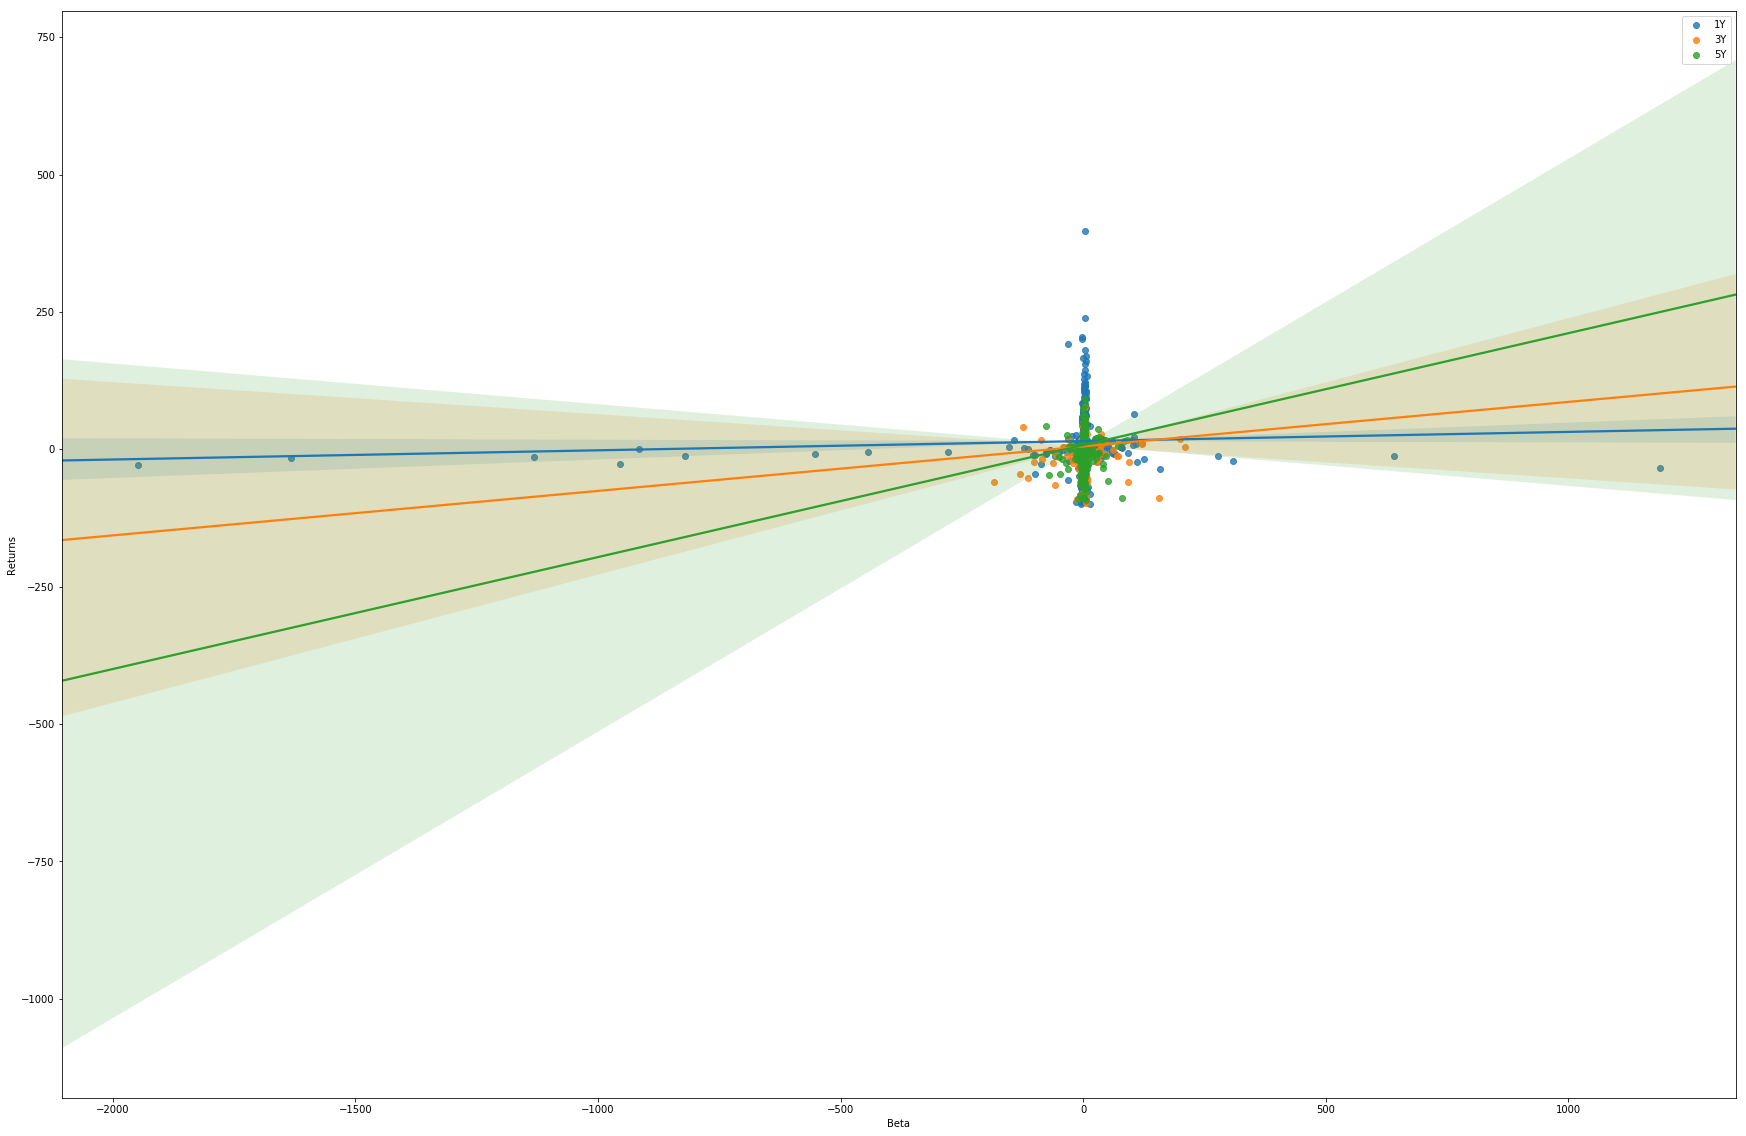

In [84]:

fig, axs = plt.subplots(figsize=(30,20))
sns.regplot(x='BETA_1Y', y='RETURN_NET_1Y', data=df3, ax=axs, label='1Y')
sns.regplot(x='BETA_3Y', y='RETURN_NET_3Y', data=df3, ax=axs, label='3Y')
sns.regplot(x='BETA_5Y',y='RETURN_NET_5Y', data=df3, ax=axs, label = '5Y')
axs.set(xlabel='Beta', ylabel='Returns')
axs.legend()

# Beta is a measure of the degree of change in value one can expect in a portfolio
# given a change in the value of its benchmark index. A portfolio with beta >1 is generally more volatile than its benchmark index
# a portfolio with a beta of less than one is generally less volatile than its benchmark index

##Overall we see 1yr having greater variability in both Beta and Returns

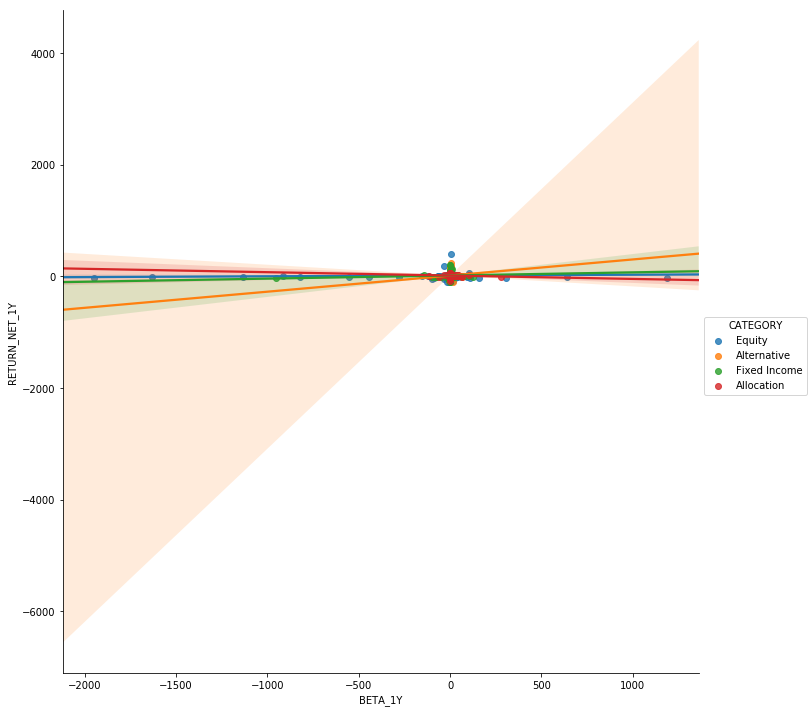

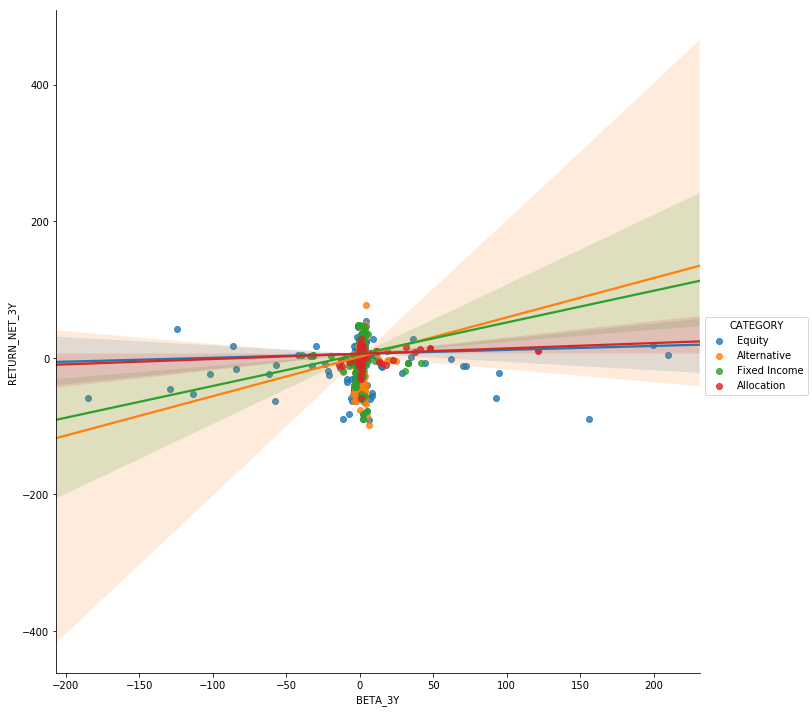

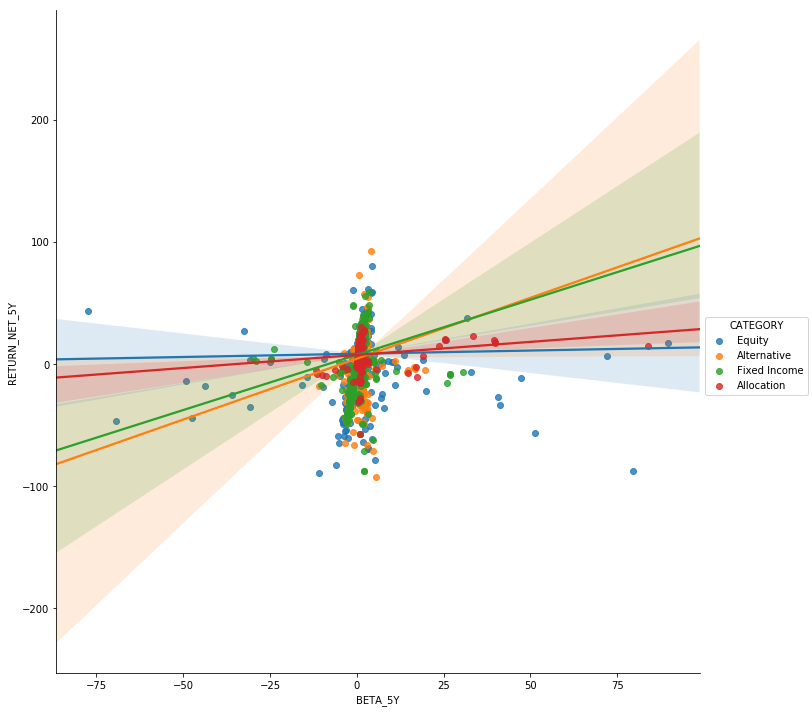

In [85]:
#Observing Beta vs. Returns for each timescale
Beta_ = df3[['CATEGORY','BETA_1Y','BETA_3Y','BETA_5Y','RETURN_NET_1Y','RETURN_NET_3Y','RETURN_NET_5Y']]

sns.lmplot(x='BETA_1Y', y='RETURN_NET_1Y', hue='CATEGORY' ,data=Beta_, size=10)
sns.lmplot(x='BETA_3Y', y='RETURN_NET_3Y', hue='CATEGORY', data=Beta_, size=10)
sns.lmplot(x='BETA_5Y', y='RETURN_NET_5Y', hue='CATEGORY', data=Beta_, size=10)


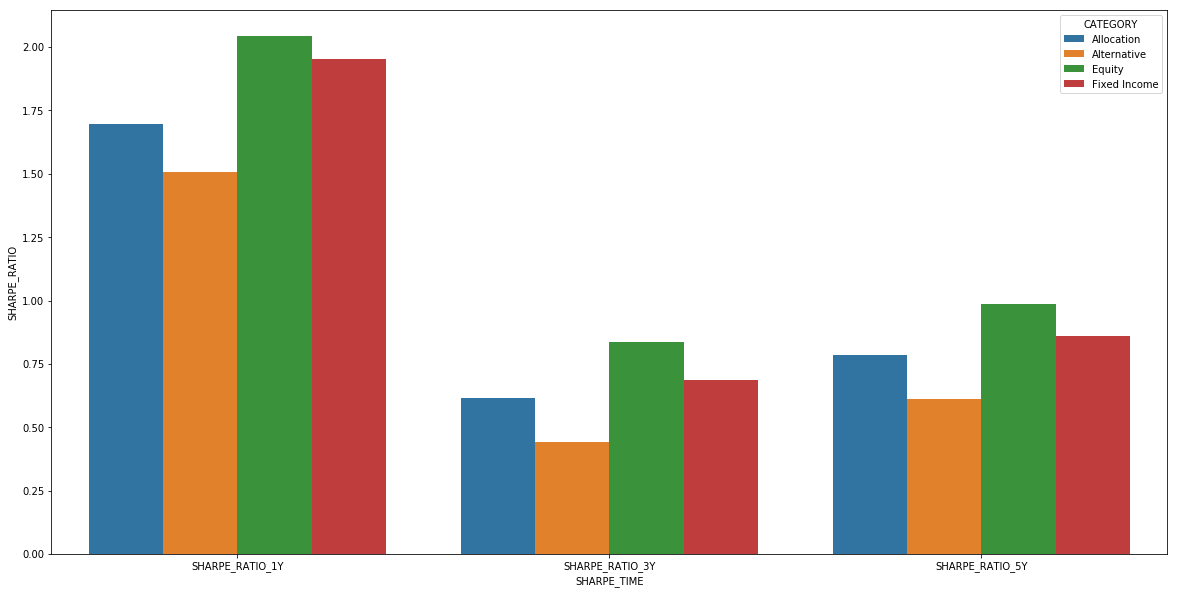

In [86]:
Sharpe_ = df3[['CATEGORY','SHARPE_RATIO_1Y','SHARPE_RATIO_3Y','SHARPE_RATIO_5Y']].groupby('CATEGORY').mean().reset_index()
melted = pd.melt(Sharpe_, id_vars='CATEGORY' ,var_name='SHARPE_TIME', value_name = 'SHARPE_RATIO')
fig, axs = plt.subplots(figsize=(20,10))
sns.barplot(x='SHARPE_TIME', y='SHARPE_RATIO',hue = 'CATEGORY', data=melted)
# The Sharpe ratio is the returns made over the risk-free rate on a per unit of risk basis. 
# Risk is often taken to be the fund's standard deviation. So, a higher Sharpe ratio should be better as it represents a higher return generated per unit of risk.
# --Equity relative to the other categories appears to consistently have a higher Sharpe Ratio across all timescales

In [87]:
Sharpe_

CATEGORY  SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y
0    Allocation         1.697948         0.613661         0.784687
1   Alternative         1.509222         0.442253         0.612350
2        Equity         2.042869         0.837433         0.988243
3  Fixed Income         1.954977         0.684793         0.860666

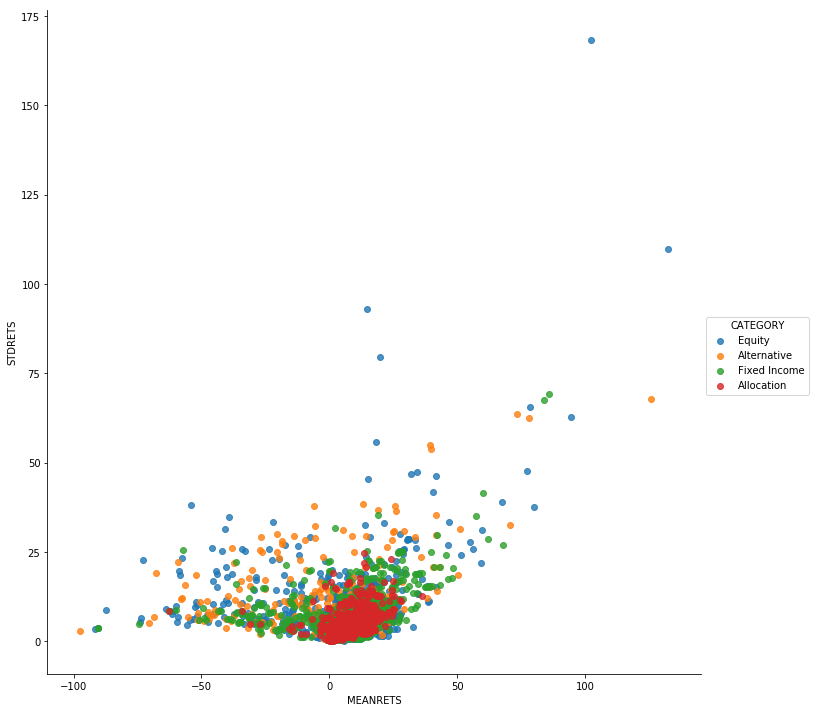

In [88]:
df3['STDRETS'] = df3[['RETURN_NET_1Y','RETURN_NET_2Y','RETURN_NET_3Y','RETURN_NET_4Y','RETURN_NET_5Y']].std(axis=1)
df3['MEANRETS']= df3[['RETURN_NET_1Y','RETURN_NET_2Y','RETURN_NET_3Y','RETURN_NET_4Y','RETURN_NET_5Y']].mean(axis=1)
sns.lmplot(x='MEANRETS', y='STDRETS', hue='CATEGORY' , fit_reg=False, data=df3, size=10)

#This is crude because it is generally accepted that you need >30 data points for a standard deviation to be meaningul at all. 
#But was curious to see if this could uncover any obvious trends

In [126]:
numcols = list(df3.select_dtypes(['float64','int64']).columns)[5:18]
numcols

['RETURN_NET_1Y',
 'RETURN_NET_2Y',
 'RETURN_NET_3Y',
 'RETURN_NET_4Y',
 'RETURN_NET_5Y',
 'SHARPE_RATIO_1Y',
 'SHARPE_RATIO_3Y',
 'SHARPE_RATIO_5Y',
 'BETA_1Y',
 'BETA_3Y',
 'BETA_5Y',
 'INFO_RATIO_3Y',
 'INFO_RATIO_5Y']

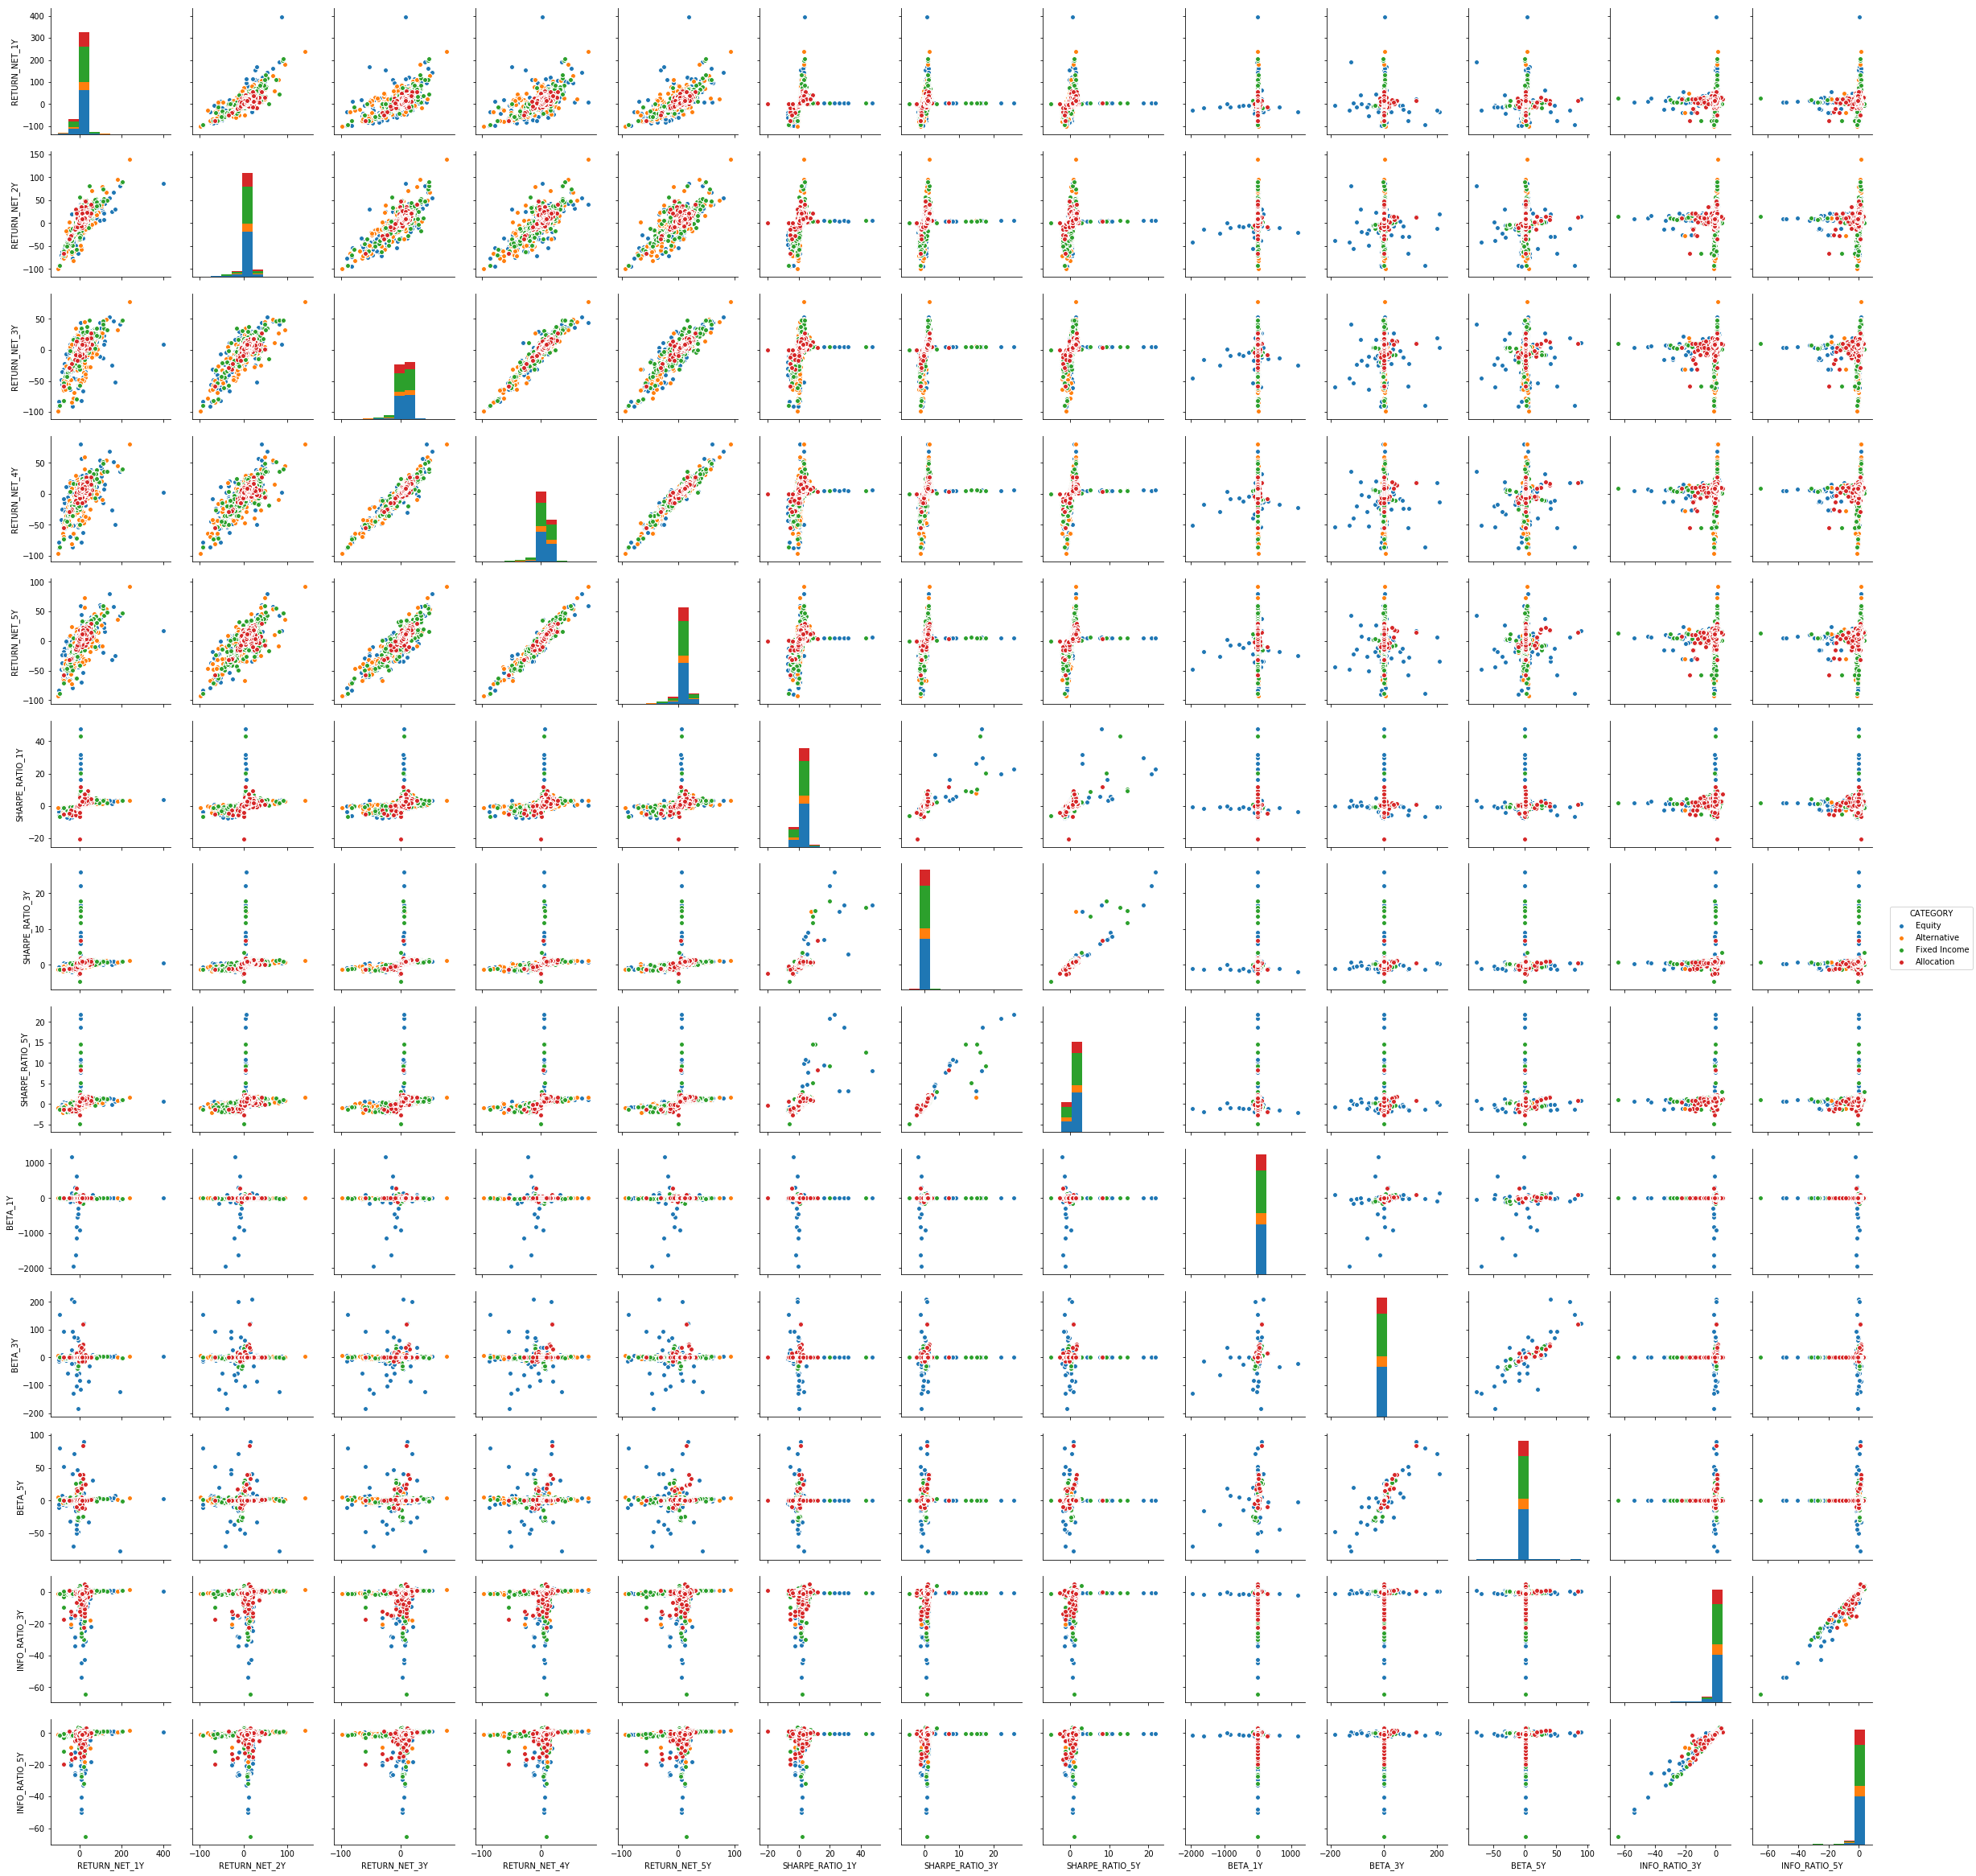

In [125]:
sns.pairplot(df3.dropna(), vars =numcols, hue = "CATEGORY", dropna = True)
#We see some strong correlation/multicolinearity between variables so linear models may not perform as well.

In [41]:
df3.head()

SHARECLASS_ID  \
0  FVUSA04ADJ                       
1  FVUSA001AQ                       
2  F00000M8U5                       
3  F00000N9TF                       
4  F0000000IA                       

                                   SHARECLASS_NAME  \
0  1290 VT Socially Responsible Portfolio Class IA   
1  1290 VT Socially Responsible Portfolio Class IB   
2                 ABC-CA CSI 300 Index Equity Fund   
3                 ABC-CA CSI 500 Index Equity Fund   
4                    ABF Hong Kong Bond Index Fund   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
0  1290 VT Socially Responsible Portfolio                    1   
1  1290 VT Socially Responsible Portfolio                    2   
2        ABC-CA CSI 300 Index Equity Fund                    1   
3        ABC-CA CSI 500 Index Equity Fund                    1   
4           ABF Hong Kong Bond Index Fund                    1   

       FUND_FAMILY_NAME MSTAR_CATEGORY_NAME    MSTAR_GLOB_CATEGORY_NAME  \
0  AXA Equitable                Large Blend  US Equity Large Cap Growth   
1  AXA Equitable                Large Blend  US Equity Large Cap Growth   
2  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
3  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
4  HSBC Investment Fund            HKD Bond           Asia Fixed Income   

  MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  RETURN_NET_1M  RETURN_NET_2M  \
0               EQUITY               FO_USA           2.32           4.73   
1               EQUITY               FO_USA           2.36           4.73   
2               Equity         ASIA-PACIFIC           4.04           4.47   
3               Equity         ASIA-PACIFIC          -0.72           1.11   
4         Fixed Income               FE_ALL          -0.50          -1.27   

   RETURN_NET_3M  RETURN_NET_6M  RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  \
0           4.49           8.61          22.82          11.81           9.80   
1           4.49           8.59          22.83          11.83           9.82   
2           6.89          17.54          21.14           8.27          17.99   
3           3.59           5.16           0.70          -3.88           7.83   
4          -0.90          -0.63          -1.34           0.47           1.12   

   RETURN_NET_4Y  RETURN_NET_5Y CATEGORY  SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  \
0          11.49          14.95   Equity             4.92             0.89   
1          11.49          14.95   Equity             4.86             0.89   
2          15.28          13.59   Equity             1.82             0.71   
3          13.23          13.82   Equity             0.02             0.38   
4           1.20           0.54   Equity            -0.79             0.21   

   SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  \
0             1.43     0.85     0.97     0.97          -0.78       -0.40272   
1             1.43     0.86     0.97     0.97          -0.78       -0.40147   
2             0.61     1.16     1.01     1.04           0.79        0.72641   
3             0.59     0.87     0.88     0.94          -0.23        0.23188   
4             0.04     0.84     0.86      NaN          -1.99            NaN   

    STDRETS  MEANRETS  
0  5.178796    14.174  
1  5.176474    14.184  
2  4.839332    15.254  
3  7.776577     6.340  
4  1.025973     0.398

## Machine Learning

In [132]:
##Assesing dataset missingness, here we will proceed by dropping rows with missing values resulting in a dataset with 5763 rows
##It does not make sense to fill in these missing columns based on standard imputation methods of using the mean, median, or mode of a column.
print(df3.shape)
print(df3.dropna().shape)
df4=df3.dropna()

(7059, 29)
(5763, 29)


In [214]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics


In [215]:
#Setting target variable and removing id values to be indexes and encoding 
le = preprocessing.LabelEncoder()

y=df4.set_index(keys=['SHARECLASS_ID','SHARECLASS_NAME'])
y=le.fit_transform(y['CATEGORY'])
y

array([2, 2, 2, ..., 0, 0, 0])

In [216]:
#Setting predictor variables and removing id values to be indexes
X=df4[df4.columns.difference(['CATEGORY','STDRETS','MEANRETS'])]
X.set_index(keys=['SHARECLASS_ID','SHARECLASS_NAME'], inplace=True)


In [217]:
#Creating encoded columns for all categorical columns in X
dummies = list(X.select_dtypes(include=['object']))
dummies
X= pd.get_dummies(X, drop_first = True, columns = dummies)


In [218]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()

#starting with tree based ensemble methods since they show promise on data that displays high levels of multicolinearity and are relatively quick to run
#80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 0 )

In [271]:
from sklearn.model_selection import cross_val_score, KFold
skf = model_selection.StratifiedKFold(n_splits=3)

def display_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv=skf, verbose=1, n_jobs=-1 )
    print(str(model) + ' Scores')
    print('Accuracy Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
def display_test_scores(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    test_score=metrics.accuracy_score(y_test,pred)
    print(str(model) + 'Test Score')
    print(test_score)
         

In [272]:
display_scores(rfc)
display_test_scores(rfc)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) Scores
Accuracy Scores: [0.83430799 0.82682292 0.82996743]
Mean: 0.8303661118598312
Standard Deviation: 0.0030687458167361356
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)Test Score
0.8837814397224631


In [273]:
display_scores(gbc)
display_test_scores(gbc)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.6s finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) Scores
Accuracy Scores: [0.92072775 0.92317708 0.93289902]
Mean: 0.9256012838079283
Standard Deviation: 0.005256269908419644
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_sta

In [274]:
display_scores(etc)
display_test_scores(etc)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) Scores
Accuracy Scores: [0.94282001 0.92838542 0.92899023]
Mean: 0.9333985525583826
Standard Deviation: 0.006666552670689485
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)Test Score
0.9601040763226366


## Hyperparameter Tuning

The models also can be improved considerably through hyperparameter tuning.
The code has been included in the notebook to show how it would be done but hasn’t been fully executed due to lack of computing power.



In [235]:

## Search grid for optimal parameters
rfc_param_grid = {
              "max_features": [1, 5, ],
              "min_samples_split": [2, 4],
              "min_samples_leaf": [1, 10],
              "n_estimators" :[100,200],
                }


rfc_tuned = GridSearchCV(rfc,param_grid = rfc_param_grid, cv=skf, scoring="accuracy", n_jobs= 4, verbose = 1)
rfc_tuned.fit(X_train,y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:   37.2s finished


0.893058568329718

In [237]:
rfc_best = rfc_tuned.best_estimator_
# Best score
rfc_tuned.best_score_

0.893058568329718

In [279]:
display_test_scores(rfc_best)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)Test Score
0.9297484822202949


In [252]:
rfc_fi = pd.DataFrame(data = rfc_best.feature_importances_ , index = X_train.columns)
rfc_fi
##Exploring feature importances if model interpretability is needed by stakeholders

0
BETA_1Y                                             0.017826
BETA_3Y                                             0.017015
BETA_5Y                                             0.016984
INFO_RATIO_3Y                                       0.017810
INFO_RATIO_5Y                                       0.017780
RETURN_NET_1M                                       0.018978
RETURN_NET_1Y                                       0.019473
RETURN_NET_2M                                       0.019332
RETURN_NET_2Y                                       0.019812
RETURN_NET_3M                                       0.019166
RETURN_NET_3Y                                       0.018167
RETURN_NET_4Y                                       0.018207
RETURN_NET_5Y                                       0.018501
RETURN_NET_6M                                       0.017911
SHARE_CLASS_COUNTER                                 0.008155
SHARPE_RATIO_1Y                                     0.018689
SHARPE_RATIO_3Y                                     0.016805
SHARPE_RATIO_5Y                                     0.017627
COMMON_SOURCE_SYSTEM_ASIA-PACIFIC                   0.004260
COMMON_SOURCE_SYSTEM_AUS-NZL                        0.005681
COMMON_SOURCE_SYSTEM_CAN                            0.001455
COMMON_SOURCE_SYSTEM_EUROPE                         0.003438
COMMON_SOURCE_SYSTEM_FE_ALL                         0.010885
COMMON_SOURCE_SYSTEM_FO_USA                         0.009598
COMMON_SOURCE_SYSTEM_GBR                            0.001506
COMMON_SOURCE_SYSTEM_LATIN-AMERICA                  0.000365
FUND_FAMILY_NAME_ABSA Capital ETF                   0.000044
FUND_FAMILY_NAME_ACTIAM N.V.                        0.000134
FUND_FAMILY_NAME_AEGON Ireland                      0.000027
FUND_FAMILY_NAME_AG Insurance (Broker               0.000018
...                                                      ...
MSTAR_GLOB_CATEGORY_NAME_Multialternative           0.000169
MSTAR_GLOB_CATEGORY_NAME_Natural Resources Sect...  0.000330
MSTAR_GLOB_CATEGORY_NAME_New Zealand Equity         0.000098
MSTAR_GLOB_CATEGORY_NAME_New Zealand Fixed Income   0.000067
MSTAR_GLOB_CATEGORY_NAME_Other Alternative          0.001014
MSTAR_GLOB_CATEGORY_NAME_Other Asia Equity          0.000259
MSTAR_GLOB_CATEGORY_NAME_Other Equity               0.001445
MSTAR_GLOB_CATEGORY_NAME_Other Europe Equity        0.000811
MSTAR_GLOB_CATEGORY_NAME_Other Europe Fixed Income  0.000756
MSTAR_GLOB_CATEGORY_NAME_Other Fixed Income         0.000090
MSTAR_GLOB_CATEGORY_NAME_Other Sector Equity        0.000557
MSTAR_GLOB_CATEGORY_NAME_Precious Metals Sector...  0.000284
MSTAR_GLOB_CATEGORY_NAME_Real Estate Sector Equity  0.000942
MSTAR_GLOB_CATEGORY_NAME_Sterling Fixed Income      0.000636
MSTAR_GLOB_CATEGORY_NAME_Taiwan Equity              0.000265
MSTAR_GLOB_CATEGORY_NAME_Target Date 2000-2020      0.000132
MSTAR_GLOB_CATEGORY_NAME_Target Date 2021-2045      0.000648
MSTAR_GLOB_CATEGORY_NAME_Target Date 2046+          0.000242
MSTAR_GLOB_CATEGORY_NAME_Technology Sector Equity   0.000335
MSTAR_GLOB_CATEGORY_NAME_Thailand Fixed Income      0.000034
MSTAR_GLOB_CATEGORY_NAME_Trading Tools              0.002652
MSTAR_GLOB_CATEGORY_NAME_UK Equity Large Cap        0.000923
MSTAR_GLOB_CATEGORY_NAME_UK Equity Mid/Small Cap    0.000259
MSTAR_GLOB_CATEGORY_NAME_US Equity Large Cap Blend  0.001341
MSTAR_GLOB_CATEGORY_NAME_US Equity Large Cap Gr...  0.000685
MSTAR_GLOB_CATEGORY_NAME_US Equity Large Cap Value  0.001026
MSTAR_GLOB_CATEGORY_NAME_US Equity Mid Cap          0.001205
MSTAR_GLOB_CATEGORY_NAME_US Equity Small Cap        0.001254
MSTAR_GLOB_CATEGORY_NAME_US Fixed Income            0.001201
MSTAR_GLOB_CATEGORY_NAME_Utilities Sector Equity    0.000239

[4774 rows x 1 columns]

In [256]:
# gbc tuning, with more time/computing power, would have expanded this grid considerably

gbc_param_grid = {
              'n_estimators' : [500],
              'learning_rate': [0.1],
              'max_depth': [ 5],
              'min_samples_leaf': [20],
              'max_features': [3] 
              }

gbc_tuned = GridSearchCV(gbc,param_grid = gbc_param_grid, cv=skf, scoring="accuracy", n_jobs= -1, verbose = 1)


In [257]:
gbc_tuned.fit(X_train,y_train)
gbc_best = gbc_tuned.best_estimator_
gbc_tuned.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished


0.5386117136659436

In [276]:
display_test_scores(gbc_best)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)Test Score
0.6001734605377277


In [262]:

## Search grid for optimal parameters
etc_param_grid = {
         "n_estimators": [1000],
        "max_depth": [1],
        "min_samples_leaf": [3],
        "min_samples_split": [5],
                }


etc_tuned = GridSearchCV(etc ,param_grid = etc_param_grid, cv=skf, scoring="accuracy", n_jobs= 4, verbose = 1)


In [265]:
etc_tuned.fit(X_train,y_train)
etc_best = etc_tuned.best_estimator_
print('train accuracy')
etc_tuned.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.8s finished


train accuracy


0.41800433839479395

In [277]:
display_test_scores(etc_best)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)Test Score
0.43798785776235905
